In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import glob
import PIL
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras import regularizers
import random

In [2]:
SEED = 123

tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arfaahsan","key":"0d6d00dc99cf526d8d1648068d197be6"}'}

In [4]:
# Create the Kaggle directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d debashishsau/aslamerican-sign-language-aplhabet-dataset

Dataset URL: https://www.kaggle.com/datasets/debashishsau/aslamerican-sign-language-aplhabet-dataset
License(s): CC0-1.0
100% 4.19G/4.20G [01:14<00:00, 119MB/s]
100% 4.20G/4.20G [01:14<00:00, 60.8MB/s]


In [7]:
zip_ref = zipfile.ZipFile('/content/aslamerican-sign-language-aplhabet-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
#Define parameters
path='/content/ASL_Alphabet_Dataset/asl_alphabet_train'
test_path='/content/ASL_Alphabet_Dataset/asl_alphabet_test'
batch_size=32
image_height=64
image_width=64

In [9]:
image_count = len(glob.glob(os.path.join(path, '*/*.jpg')))
print(f'Total Images in the Dataset :{image_count}')

Total Images in the Dataset :204924


In [10]:
#loading your images
train_ds=keras.utils.image_dataset_from_directory(
    directory=path,
    batch_size=batch_size,
    image_size=(image_height,image_width),
    seed=42,
    validation_split=0.2,
    subset="training"

)

validation_ds=keras.utils.image_dataset_from_directory(
    directory=path,
    batch_size=batch_size,
    image_size=(image_height,image_width),
    seed=42,
    validation_split=0.2,
     subset="validation"

)

Found 223074 files belonging to 29 classes.
Using 178460 files for training.
Found 223074 files belonging to 29 classes.
Using 44614 files for validation.


In [11]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import numpy as np

test_path = "/content/ASL_Alphabet_Dataset/asl_alphabet_test"
test_images = []
test_filenames = []

for fname in os.listdir(test_path):
    if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
        img = load_img(os.path.join(test_path, fname), target_size=(image_height, image_width))
        img_array = img_to_array(img) / 255.0
        test_images.append(img_array)
        test_filenames.append(fname)

# Convert list to NumPy array
test_images = np.array(test_images)

print(f"Loaded {len(test_images)} test images")

Loaded 28 test images


In [12]:
# Displaying Class Names
class_names = train_ds.class_names
print("Classes:", class_names)

Classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


### Single Images

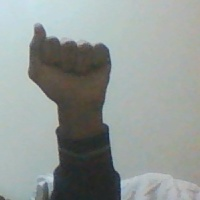

In [13]:
A = list(glob.glob(os.path.join(path, 'A/*')))
PIL.Image.open(str(A[0]))

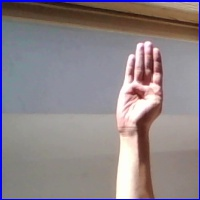

In [14]:
B = list(glob.glob(os.path.join(path, 'B/*')))
PIL.Image.open(str(B[0]))

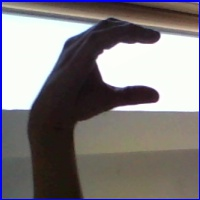

In [15]:
C = list(glob.glob(os.path.join(path, 'C/*')))
PIL.Image.open(str(C[0]))

### Batch Images

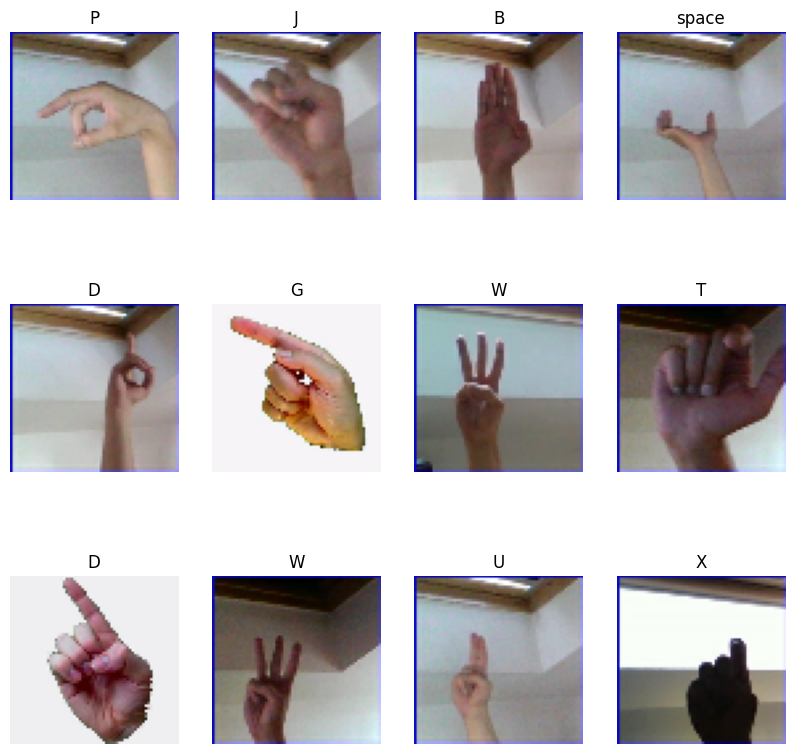

In [16]:
#  Display a batch of images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

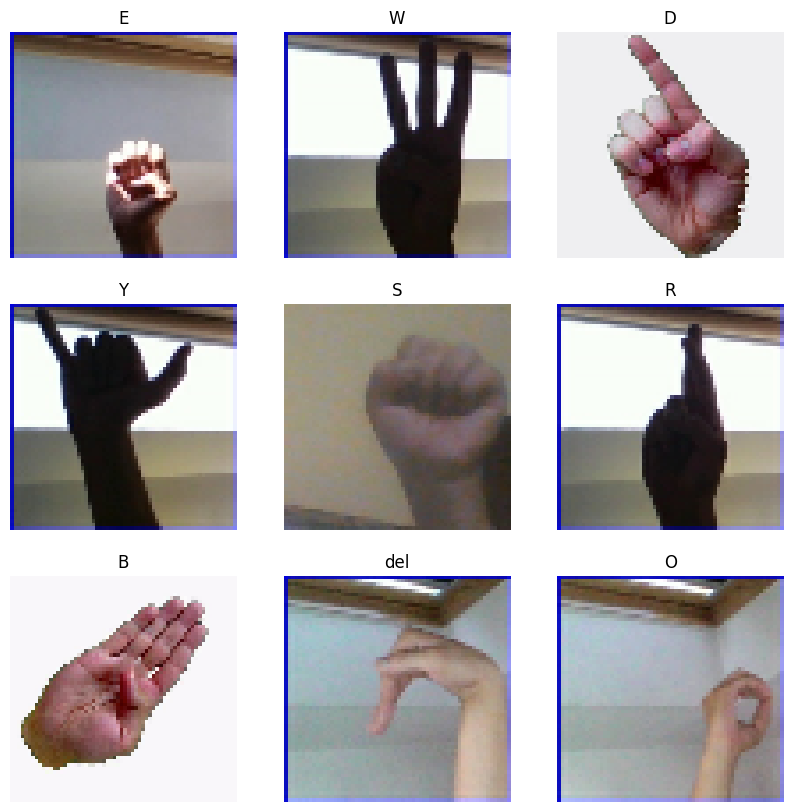

In [17]:
for images, labels in train_ds.skip(1).take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

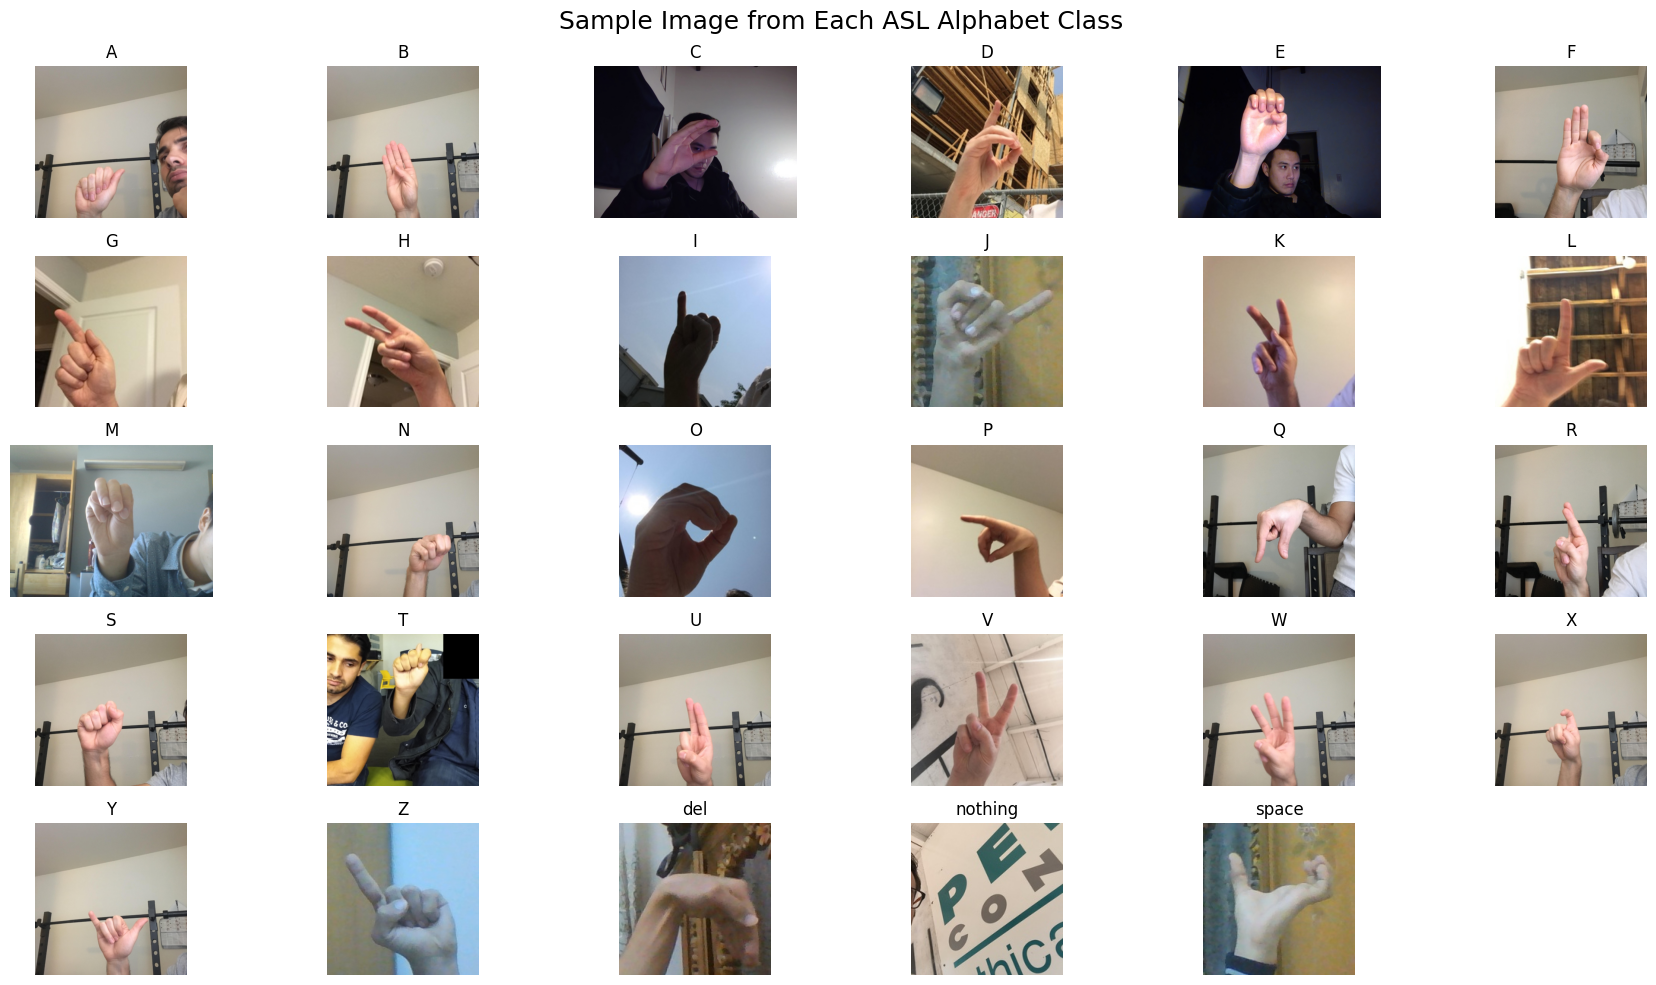

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import defaultdict
import os
import glob

# Path to ASL training images
image_dir = '/content/ASL_Alphabet_Dataset/asl_alphabet_train'

# Get all image paths
all_images = glob.glob(os.path.join(image_dir, '*/*.jpg'))

# Group images by letter (class)
asl_images = defaultdict(list)
for img_path in sorted(all_images):
    letter = os.path.basename(os.path.dirname(img_path))
    asl_images[letter].append(img_path)


images = []
letters = []

for letter, imgs in asl_images.items():
    if len(imgs) > 1:
        images.append(imgs[1])   # pick the 2nd image
        letters.append(letter)

# Show sample images
plt.figure(figsize=(18, 10))
for i, (img_path, label) in enumerate(zip(images, letters)):
    img = mpimg.imread(img_path)
    plt.subplot(5, 6, i + 1)
    plt.imshow(img)
    plt.title(label, fontsize=12)
    plt.axis('off')

plt.suptitle('Sample Image from Each ASL Alphabet Class', fontsize=18)
plt.tight_layout()
plt.show()

In [19]:
import os

class_counts = {}

for class_name in os.listdir(path):
    class_dir = os.path.join(path, class_name)
    if os.path.isdir(class_dir):
        count = len([f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))])
        class_counts[class_name] = count

# Print nicely
for cls, count in sorted(class_counts.items()):
    print(f"{cls}: {count} images")

# Optional: total check
print("\nTotal images:", sum(class_counts.values()))

A: 8458 images
B: 8309 images
C: 8146 images
D: 7629 images
E: 7744 images
F: 8031 images
G: 7844 images
H: 7906 images
I: 7953 images
J: 7503 images
K: 7876 images
L: 7939 images
M: 7900 images
N: 7932 images
O: 8140 images
P: 7601 images
Q: 7954 images
R: 8021 images
S: 8109 images
T: 8054 images
U: 8023 images
V: 7597 images
W: 7787 images
X: 8093 images
Y: 8178 images
Z: 7410 images
del: 6836 images
nothing: 3030 images
space: 7071 images

Total images: 223074


/tmp/ipython-input-4052875869.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Class', x='Count', data=df_counts, palette='viridis')


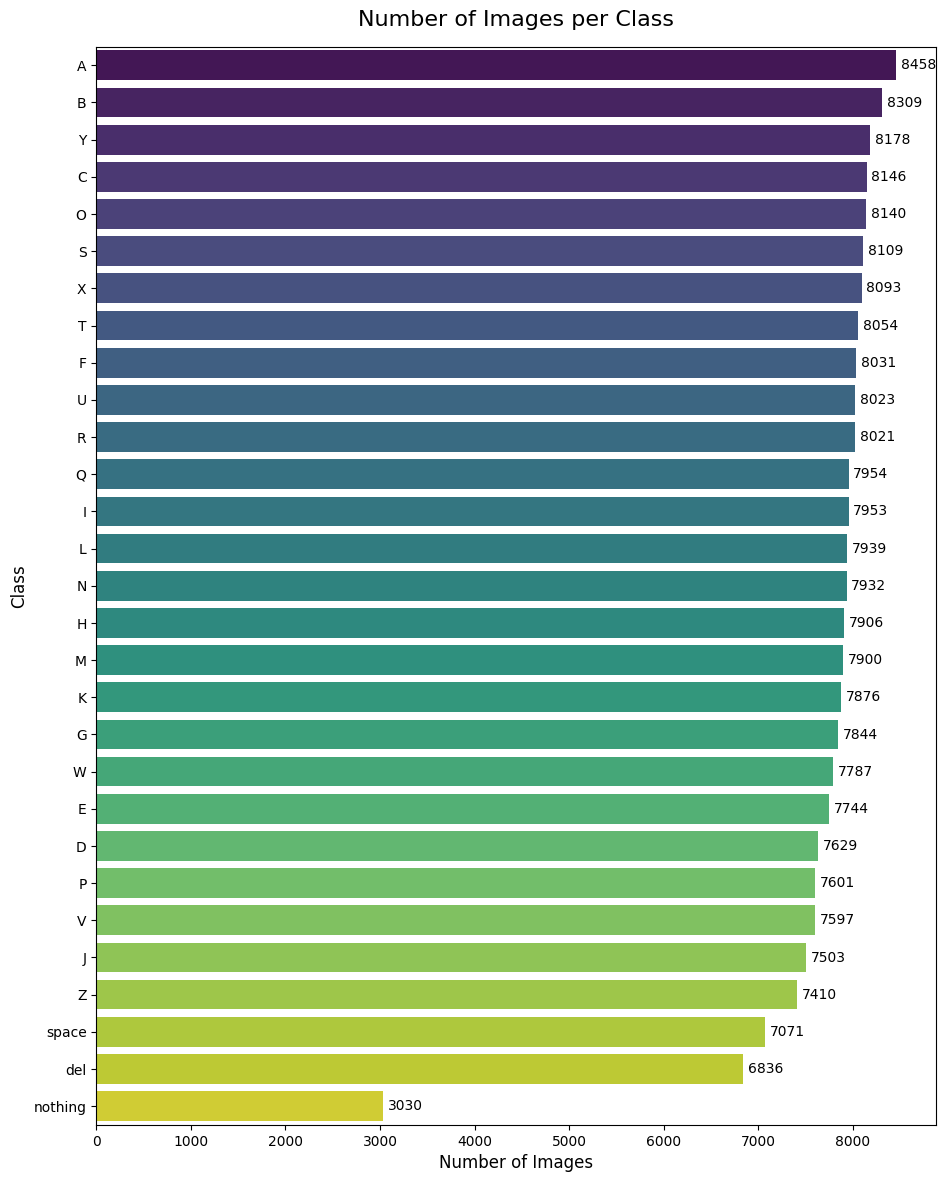

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert dictionary to DataFrame
df_counts = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])

# Sort by count (optional for better visualization)
df_counts = df_counts.sort_values('Count', ascending=False)

plt.figure(figsize=(12, 14))  # Make taller to fit all classes
sns.barplot(y='Class', x='Count', data=df_counts, palette='viridis')

# Add labels on bars
for i, row in enumerate(df_counts.itertuples()):
    plt.text(row.Count + 50, i, str(row.Count), va='center', fontsize=10)

plt.title('Number of Images per Class', fontsize=16, pad=15)
plt.xlabel('Number of Images', fontsize=12)
plt.ylabel('Class', fontsize=12)

plt.subplots_adjust(left=0.2)  # Extra space for y-axis labels
plt.show()

In [21]:
def normalize_img(image, label):

    # Normalize pixel values
    image = tf.cast(image, tf.float32) / 255.0

    return image, label

In [22]:
train_ds = train_ds.map(normalize_img)
val_ds = validation_ds.map(normalize_img)


In [23]:
model = Sequential()

# Conv Block 1
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

# Conv Block 2
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

# Conv Block 3
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

# Global Pooling instead of Flatten
model.add(GlobalAveragePooling2D())

# Dense
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output
model.add(Dense(29, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │        14,877 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369,341 (1.41 MB)

 Trainable params: 368,637 (1.41 MB)

 Non-trainable params: 704 (2.75 KB)

In [25]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [27]:
history=model.fit(train_ds,epochs=15,validation_data=val_ds,callbacks=[early_stop])

Epoch 1/15
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 196s 33ms/step - accuracy: 0.6844 - loss: 1.0854 - val_accuracy: 0.9514 - val_loss: 0.1622
Epoch 2/15
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 177s 30ms/step - accuracy: 0.9581 - loss: 0.1328 - val_accuracy: 0.7969 - val_loss: 0.8491
Epoch 3/15
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 156s 28ms/step - accuracy: 0.9734 - loss: 0.0857 - val_accuracy: 0.9815 - val_loss: 0.0598
Epoch 4/15
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 126s 23ms/step - accuracy: 0.9795 - loss: 0.0664 - val_accuracy: 0.9881 - val_loss: 0.0385
Epoch 5/15
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 144s 26ms/step - accuracy: 0.9845 - loss: 0.0494 - val_accuracy: 0.9714 - val_loss: 0.1001
Epoch 6/15
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 202s 26ms/step - accuracy: 0.9864 - loss: 0.0445 - val_accuracy: 0.9881 - val_loss: 0.0405
Epoch 7/15
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 145s 26ms/step - accuracy: 0.9881 - loss: 0.0394 - val_accuracy: 0.9895 - val_loss: 0.0370
Epoch 8/15
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 125s 22ms/step - accuracy: 

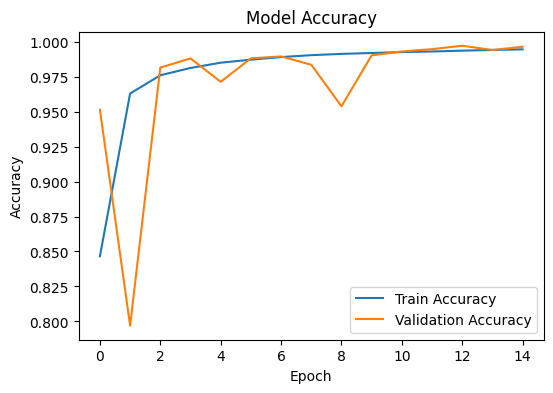

In [28]:
# Accuracy plot
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

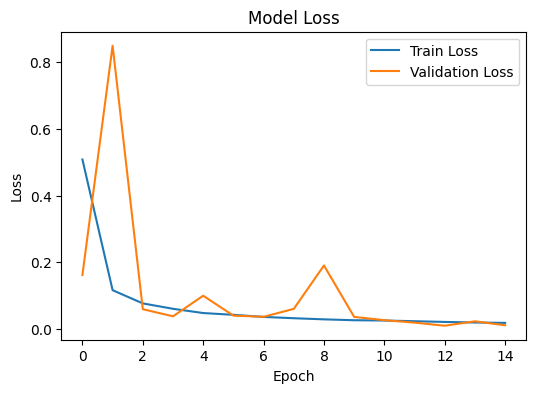

In [30]:
# Loss plot
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


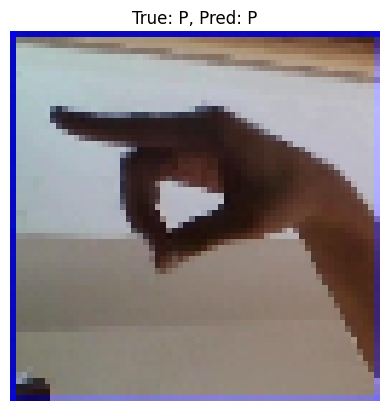

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


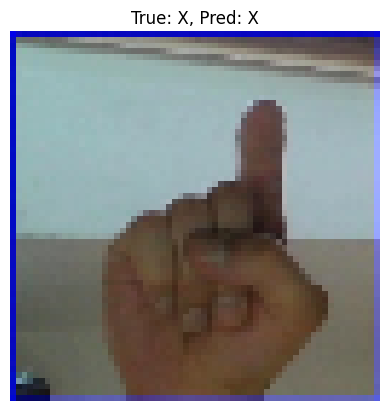

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


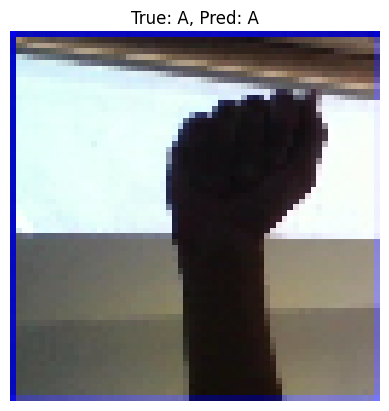

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


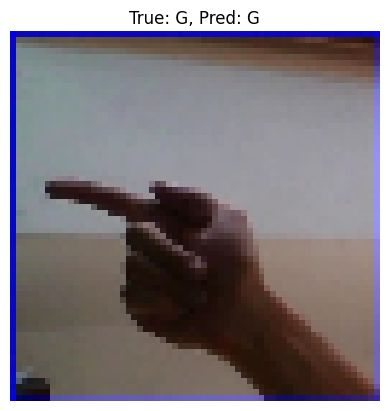

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


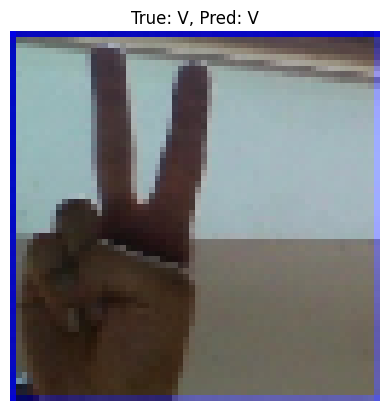

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Number of random samples to show
num_samples = 5
indices = np.random.choice(len(test_images), num_samples, replace=False)

for i in indices:
    img = test_images[i]
    fname = test_filenames[i]

    # True label from filename (first character before "_")
    true_label = fname.split("_")[0]

    # Expand dimensions for prediction
    img_input = np.expand_dims(img, axis=0)
    # Get prediction
    prediction = model.predict(img_input)
    predicted_class = np.argmax(prediction)
    predicted_label = class_names[predicted_class]

    # Plot image with true vs predicted
    plt.imshow(img)
    plt.title(f"True: {true_label}, Pred: {predicted_label}")
    plt.axis('off')
    plt.show()


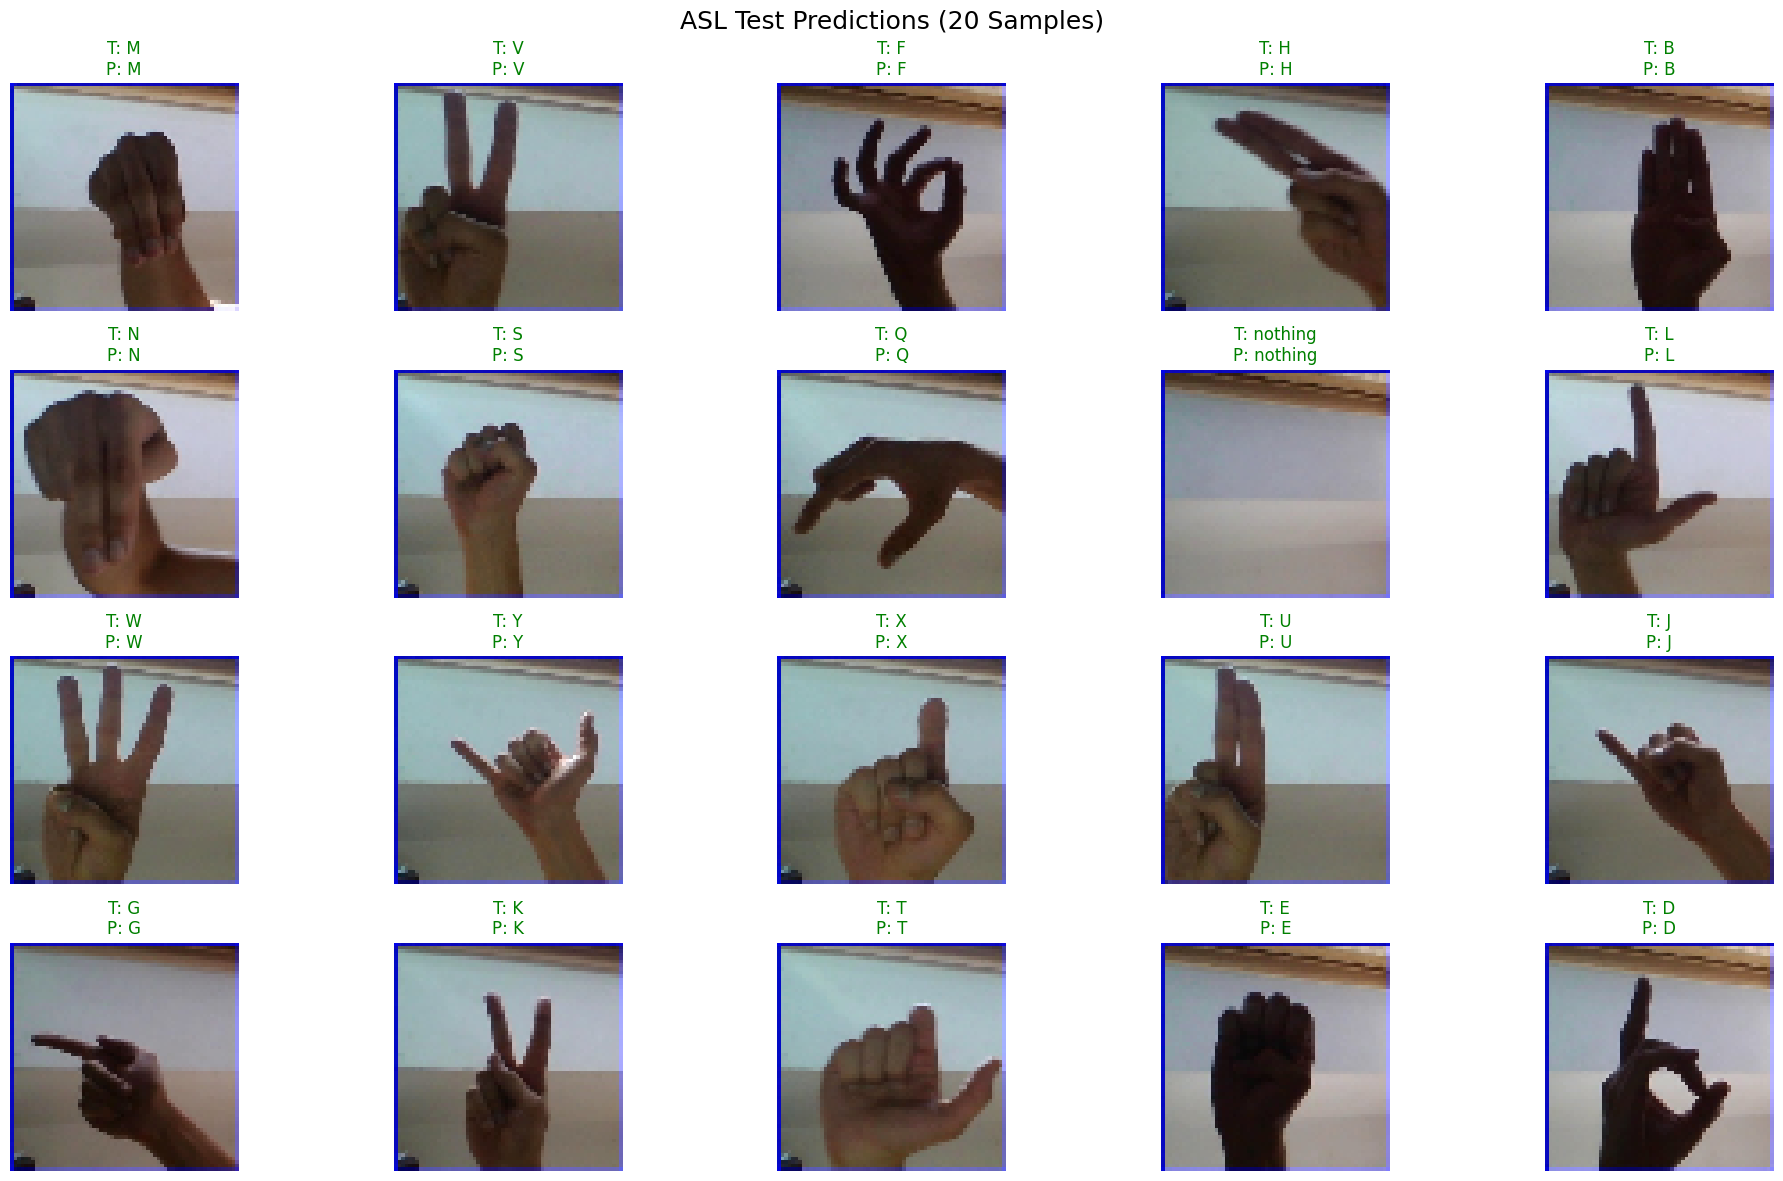

In [32]:

# Number of random samples to show
num_samples = 20
indices = np.random.choice(len(test_images), num_samples, replace=False)

# Grid size (e.g., 4 rows x 5 cols)
rows, cols = 4, 5
plt.figure(figsize=(20, 12))

for idx, i in enumerate(indices):
    img = test_images[i]
    fname = test_filenames[i]

    # True label from filename (before "_")
    true_label = fname.split("_")[0]

    # Predict
    img_input = np.expand_dims(img, axis=0)
    prediction = model.predict(img_input, verbose=0)
    predicted_class = np.argmax(prediction)
    predicted_label = class_names[predicted_class]

    # Plot
    plt.subplot(rows, cols, idx + 1)
    plt.imshow(img)
    color = "green" if predicted_label == true_label else "red"
    plt.title(f"T: {true_label}\nP: {predicted_label}", color=color, fontsize=12)
    plt.axis("off")

plt.suptitle("ASL Test Predictions (20 Samples)", fontsize=18)
plt.tight_layout()
plt.show()